<a href="https://colab.research.google.com/github/clivethe14/TIFF-to-JPEG-conversion-python-program/blob/master/Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Representation in Scikit-Learn:

In [ ]:
# Import necessary libraries
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()


Target array: Species labels (0 for Setosa, 1 for Versicolour, 2 for Virginica)

Features matrix: Sepal Length, Sepal Width, Petal Length, Petal Width

----------------------------------------------------------------------------

X contains the measurements (features) for each iris sample.

y contains the corresponding species labels for each sample.

In [ ]:
X = iris.data

y = iris.target

In [ ]:
# Display the first few rows of the features matrix (X)
print("Features matrix (X):")
print(X[:10])  # Display the first 10 samples

# Display the target array (y)
print("\nTarget array (y):")
print(y)

Features matrix (X):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Target array (y):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Supervised Learning - Linear Regression:

In [ ]:
# Import linear regression libraries
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Split dataset into test and train data set to test accuracy
from sklearn.model_selection import train_test_split
Xtrain, Xtest,ytrain,ytest = train_test_split(X,y, random_state=1)

In [ ]:

#Train the model using linear regression
model.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
#predict using model with the test data
y_pred = model.predict(Xtest)

print("Predicted data: ")
print(y_pred[:10])
print("\nTest Data: ")
print(ytest[:10])

Predicted data: 
[-0.32592601  0.87460472  1.15646699 -0.10325012  1.83913817  1.42913499
  1.75943511  0.17340773  0.06135701  1.96800975]

Test Data: 
[0 1 1 0 2 1 2 0 0 2]


In [ ]:
#import library for R2 score metrics
from sklearn.metrics import r2_score

#calculate accuracy score using test and predicted data
r2_score(ytest, y_pred)

0.899354171561691

We evaluate the model’s performance using R-squared (R2) Score.

Higher R2 indicates better performance.

A perfect fit would have an R2 score of 1.0.

If the model performs no better than predicting the mean, the R2 score would be 0.0.

Negative R2 scores indicate that the model is worse than predicting the mean.

# Supervised Learning - Iris Classification:

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Train the model on the training data
svm_model.fit(Xtrain, ytrain)

SVC(kernel='linear')

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
logreg_model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [ ]:
# Predictions using both models
logreg_predictions = logreg_model.predict(Xtest)
svm_predictions = svm_model.predict(Xtest)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Accuracy scores calculated
logreg_accuracy = accuracy_score(ytest, logreg_predictions)
svm_accuracy = accuracy_score(ytest, svm_predictions)

In [ ]:
print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")

Logistic Regression Accuracy: 0.97
SVM Accuracy: 1.00


In [ ]:
# Confusion matrices evaluated
logreg_confusion_matrix = confusion_matrix(ytest, logreg_predictions)
svm_confusion_matrix = confusion_matrix(ytest, svm_predictions)


Logistic Regression Confusion Matrix:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


Text(77.92222222222227, 0.5, 'predicted values')

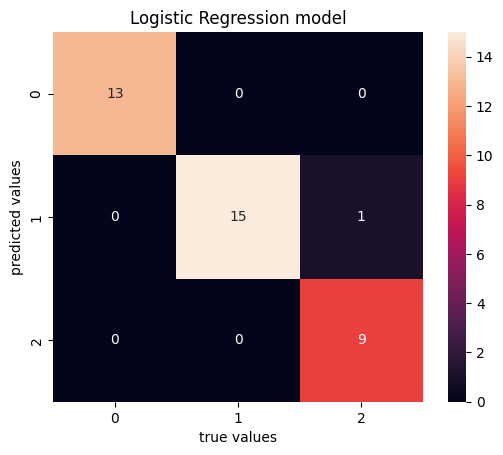

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#printing the confusion matrix along with a heatmap using seaborn to indicate the accuracy of our prediction for the logistical regression model
print("\nLogistic Regression Confusion Matrix:")
print(logreg_confusion_matrix)

sns.heatmap(logreg_confusion_matrix, square=True, annot=True)

plt.title('Logistic Regression model')
plt.xlabel('true values')
plt.ylabel('predicted values')


SVM Confusion Matrix:
[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


Text(77.92222222222227, 0.5, 'predicted values')

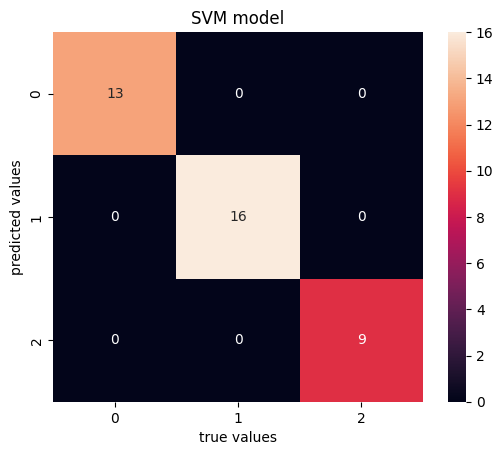

In [ ]:
#printing the confusion matrix along with a heatmap using seaborn to indicate the accuracy of our prediction for the SVM model
print("\nSVM Confusion Matrix:")
print(svm_confusion_matrix)

sns.heatmap(svm_confusion_matrix, square=True, annot=True)

plt.title('SVM model')
plt.xlabel('true values')
plt.ylabel('predicted values')

# Unsupervised Learning - Dimensionality Reduction on Iris Dataset:

In [ ]:
from sklearn import datasets, decomposition

# Apply PCA with 3 components (to visualize in 3D)
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

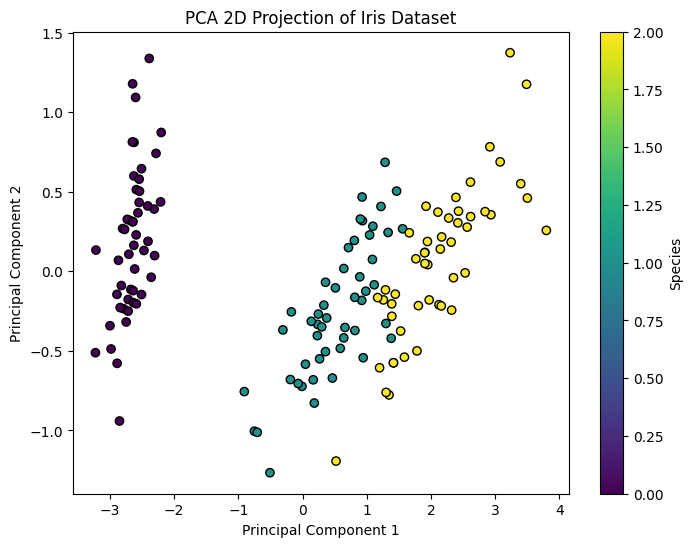

In [ ]:
# Visualize the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D Projection of Iris Dataset")
plt.colorbar(label="Species")
plt.show()

**Discuss how dimensionality reduction might be useful in data analysis.**

Dimensionality reduction might be useful in data analysis for the following reasons:

**Reduced Computation Time**: Data with high dimentionality generally requires more computational resources. By effectively reducing the number of dimensions, we speed up the time required for model training and prediction.

**Visualization**: PCA is one of the methods which allows us to visualize complex data in lower dimensions (e.g., 3D scatter plots). It helps identify patterns and clusters.

**Noise Reduction**: The removal of irrelevant or noisy features helps improve performance of the model.

**Feature Selection**: due to the features of PCA we are able to select the most informative features for modeling.

**Curse of Dimensionality**: High dimensions can often lead to overfitting and poor generalization. thus, Dimensionality reduction can helps us mitigate this issue.

In summary, dimensionality reduction enhances model efficiency, interpretability, and performance.

# Unsupervised Learning - Clustering:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Standardize features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
# Apply K-Means with different values of K
inertia_values = []
silhouette_scores = []
k_values = range(2, 11)  # Try K from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

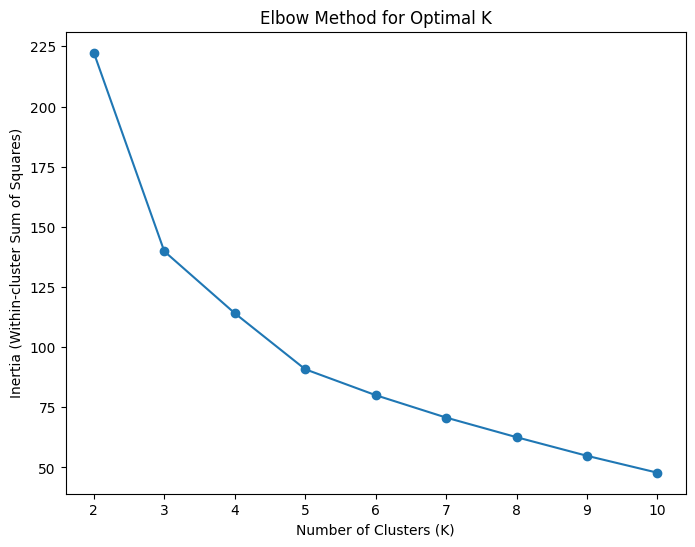

In [ ]:
# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

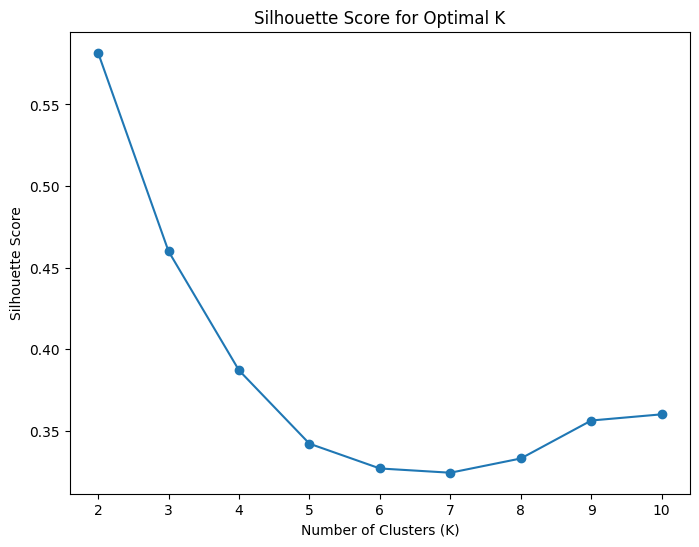

In [ ]:
# Plot Silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()

**Optimal Number of Clusters**

The Elbow Method suggests the optimal number of clusters by looking for the “elbow” point where inertia starts decreasing more slowly.

The Silhouette Score measures how well-separated the clusters are. Higher scores indicate better-defined clusters.

Based on both methods we can select 3 as the optimal number of clusters.

In [ ]:
# Fit K-Means with optimal K
optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

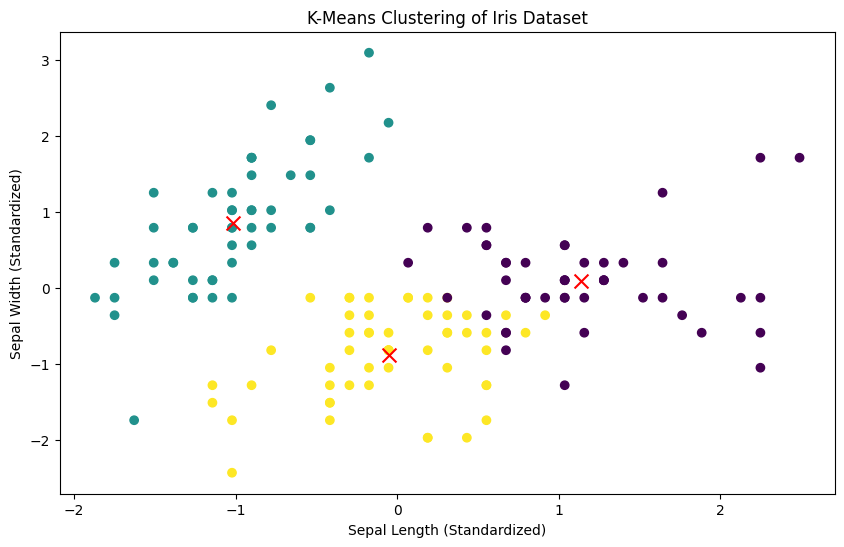

In [ ]:
# Visualize clusters (choose two dimensions for 2D plot)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_optimal.labels_, cmap='viridis', marker='o')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Sepal Width (Standardized)")
plt.title("K-Means Clustering of Iris Dataset")
plt.show()

The scatter plot shows how the data points are grouped into clusters based on sepal length and width. Each cluster center (red ‘x’) represents a centroid.

# Application - Exploring Hand-written Digits:

In [ ]:
# Load the digits dataset
digits = datasets.load_digits()

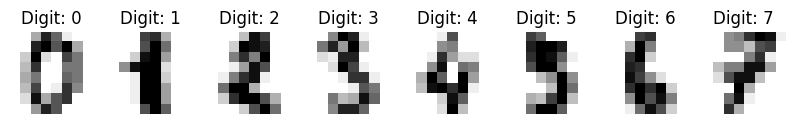

In [ ]:
# Visualize the first few images
_, axes = plt.subplots(nrows=1, ncols=8, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Digit: {label}")

plt.show()

In [ ]:
# Flatten the images (turn 2-D arrays into 1-D)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
# Split data into train and test subsets
Xtrain, Xtest, ytrain, ytest = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

In [ ]:
# Create an SVC classifier
clf = SVC(gamma=0.001)

# Train the model
clf.fit(Xtrain, ytrain)

SVC(gamma=0.001)

In [ ]:
# Predict digits on the test subset
predicted = clf.predict(Xtest)

In [ ]:
svm_confusion_matrix = confusion_matrix(ytest, predicted)

Text(77.92222222222227, 0.5, 'predicted values')

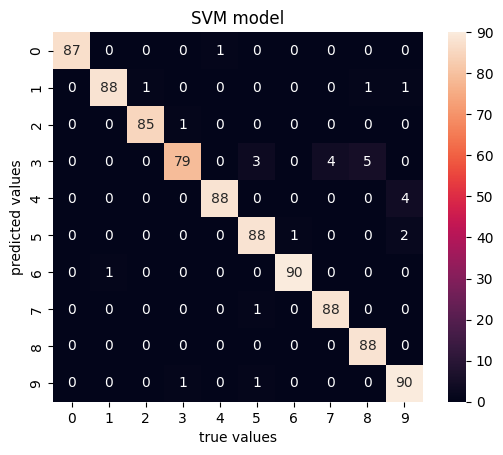

In [ ]:
sns.heatmap(svm_confusion_matrix, square=True, annot=True)

plt.title('SVM model')
plt.xlabel('true values')
plt.ylabel('predicted values')

In [ ]:
from sklearn import metrics

# Classification report
print(f"Classification report for classifier {clf}:\n{metrics.classification_report(y_test, predicted)}")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



# Conclusion


**Summary of Findings and Insights:**

Scikit-Learn (also known as sklearn) is a powerful Python library for machine learning and data science.

We explored various functionalities of Scikit-Learn, including:

*   Loading datasets (e.g., Iris, digits).
*   Applying classification algorithms (e.g., Logistic Regression, SVM).
*   Dimensionality reduction (e.g., PCA).
*   Clustering (e.g., K-Means).

We visualized data, evaluated models, and learned about metrics (accuracy, silhouette score).

Scikit-Learn simplifies model building, evaluation, and deployment.

**Applicability of Scikit-Learn:**
Real-world Data Science: Scikit-Learn is widely used in industry and research for solving practical problems.

**Versatility:** It supports various tasks (classification, regression, clustering, dimensionality reduction).

**Robustness:** Scikit-Learn provides efficient implementations of algorithms and handles large datasets.
Community and Documentation: Active community, extensive documentation, and tutorials.

**Education and Prototyping:** Ideal for learning, prototyping, and experimenting.

In conclusion, Scikit-Learn is a valuable tool for both beginners and experienced data scientists, enabling them to tackle real-world challenges effectively.